Introduction to Sympy and the IPython Notebook for engineering calculations
===========================================================================

Sympy is a computer algebra module for Python. You are looking at the convenient IPython Notebook interface. This notebook aims to show some of the useful features of the Sympy system as well as the notebook interface.

This notebook will use Python as the programming language. This means that most of what you learned in MPR can be applied in the notebook. The notebook interface provides "cells" where one can input code. To run the code, click on a cell and press Shift+Enter.

A quick tour
------------

Take a second to go through the tour of the notebook interface by clicking on "Help, User Interface Tour". Also note that there is help available for a number of other things under that menu.

Now that you are familiar with the nomenclature, let's run some code!

*Evaluate the cell below to print out a message by clicking inside the cell and then pressing Shift + Enter*


In [1]:
for word in ['Hello', 'World']:
    print word

Hello
World


Math in text boxes
------------------

The text editor supports math in [$\LaTeX$]() notation. You can double-click on a text box to see the codes used to enter it:

$$f(a)=\int_\infty^0 \frac{1}{a+2} \mathrm{d}a$$

Double-click on the formula above to see the code that produced it.

SymPy
-----

We need to import [the SymPy module](http://docs.sympy.org/latest/index.html) to get symbolic math capabilities.

In [1]:
import sympy

We need to start the pretty-printer to get nicely typeset math

_Note that this changes somewhat based on the version of sympy_

In [2]:
sympy.init_printing()

In order to do symbolic calculations, we need to create a symbol

In [3]:
x = sympy.Symbol('x')

In [4]:
x

Sympy allows us to do many mathematical operations that would be tedious by hand. For instance, we can expand a polynomial:

In [5]:
polynomial = (2*x + 3)**4
polynomial.expand()

Notice what happened - we defined a new name called "polynomial" and then used the .expand() method to expand the polynomial. We can see all the methods associated with an object by typing its name and a dot then pressing "tab".

Call up the list of methods for the polynomial variable by pressing tab at the end of the line in the cell below:

In [6]:
polynomial.

SyntaxError: invalid syntax (<ipython-input-6-811f4a6f042f>, line 1)

To get help about any method, we can type its name and append a ? at the end, then evaluate the cell

Obtain help about the .expand() method by evaluating the cell below:

In [7]:
polynomial.expand?

Of course, we can also factor polynomials:

In [8]:
(x**2 + 2*x + 1).factor()

Calculus
--------

Sympy knows how to integrate and differentiate

In [9]:
polynomial.diff(x) # First derivative

In [10]:
polynomial.diff(x, 2) # Second derivative

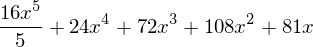

In [11]:
polynomial.integrate(x) # indefinite integral - note no constant of integration is added

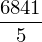

In [12]:
polynomial.integrate((x, 1, 2)) # Note that integrate takes one argument which is a tuple for the definite integral

Limits
------

We can evaluate limits using Sage, even for "interesting" limits where we would need L'Hopital's rule

In [14]:
sympy.limit((2*sympy.sin(x) - sympy.sin(2*x))/(x - sympy.sin(x)), x, 0)

Approximation
-------------

SymPy has built-in support for taylor series expansion

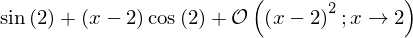

In [16]:
nonlinear_expression = sympy.sin(x)
sympy.series(nonlinear_expression, x, 2, 2) # taylor expansion in terms of the x variable, around x=2, first order.

Solving equations
-----------------

Sympy can help us solve manipulate equations using the `solve` function. Like many solving functions, it finds zeros of a function, so we have to rewrite equalities to be equal to zero, 

$$ 2x^2 + 2 = 4 \therefore 2x^2 + 2 - 4 = 0$$

In [18]:
solutions = sympy.solve(2*x**2 + 2 - 4)
solutions

In [19]:
solutions[0]

We can also use `sympy.Eq` to construct equations

In [22]:
equation = sympy.Eq(2*x**2 + 2, 4)
equation

The roots function will give us the multiplicity of the roots as well.

In [24]:
sympy.roots(equation)

We can also solve systems of equations by passing a list of equations to solve and asking for a list of variables to solve for

In [27]:
x, y = sympy.symbols('x y')
sympy.solve([x + y - 2, 
             x - y - 0], [x, y])

This even works with symbolic variables in the equations

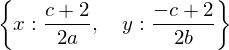

In [30]:
a, b, c = sympy.var('a, b, c')
sympy.solve([a*x + b*y - 2,
       a*x - b*y - c], [x, y])